In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [9]:
X = df.drop(columns='Survived')
y = df['Survived']
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [14]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# For Numerical value using Pandas

In [15]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus_1'] = X_train["Age"].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus_1'] = X_train["Fare"].fillna(-1)
X_train

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


# Check Variance

In [16]:
variance_check = pd.DataFrame(
    {
        'Column':['Age','Fare'],
        'Original variance':[X_train['Age'].var(),X_train['Fare'].var()],
        '99 Impute variance':[X_train['Age_99'].var(),X_train['Fare_99'].var()],
        '-1 Impute variance':[X_train['Age_minus_1'].var(),X_train['Fare_minus_1'].var()]
    }
)
variance_check

,Column,Original variance,99 Impute variance,-1 Impute variance
0,Age,204.349513,951.727557,318.089620
1,Fare,2448.197914,2536.077343,2378.567678


# Check Distribution

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


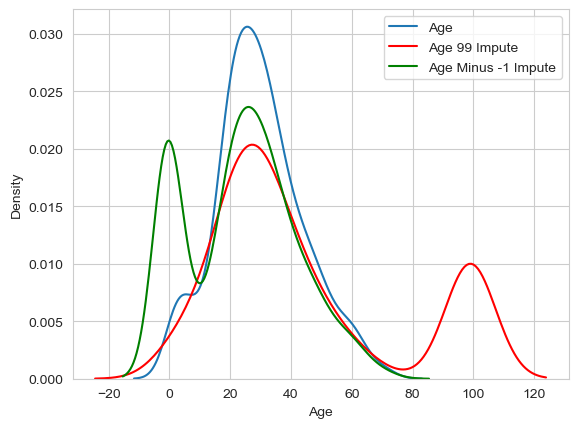

In [17]:
sns.kdeplot(data=X_train, x='Age', label='Age')
sns.kdeplot(data=X_train, x='Age_99', color='red', label='Age 99 Impute')
sns.kdeplot(data=X_train, x='Age_minus_1', color='green', label='Age Minus -1 Impute')
plt.legend()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


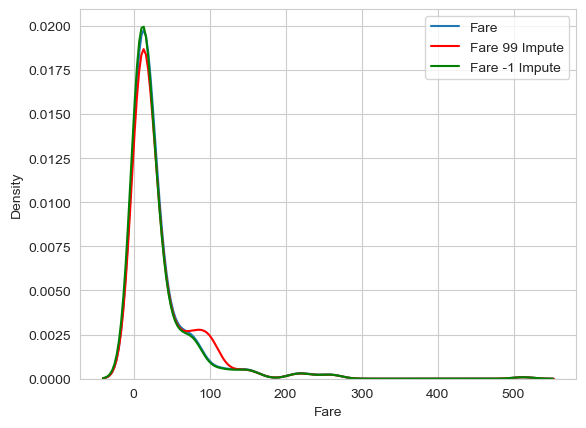

In [18]:
sns.kdeplot(data=X_train, x='Fare', label='Fare')
sns.kdeplot(data=X_train, x='Fare_99', color='red', label='Fare 99 Impute')
sns.kdeplot(data=X_train, x='Fare_minus_1', color='green', label='Fare -1 Impute')
plt.legend()

# Check covariance

In [19]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus_1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus_1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


# Check correlation

In [20]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus_1,Fare_99,Fare_minus_1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_minus_1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_minus_1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


<Axes: >

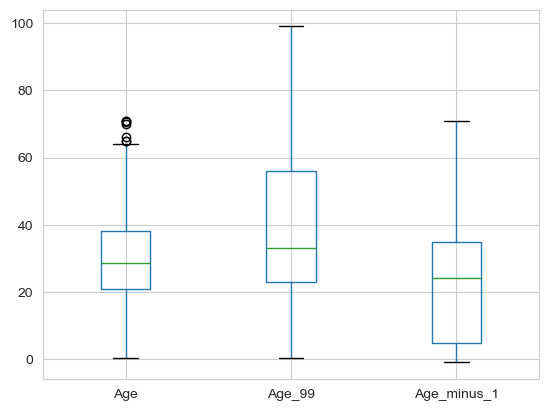

In [21]:
X_train[['Age','Age_99','Age_minus_1']].boxplot()

<Axes: >

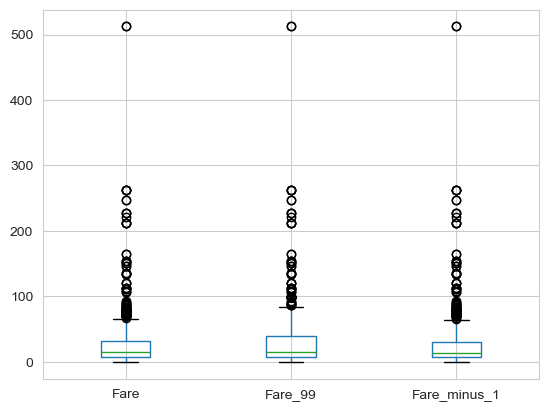

In [22]:
X_train[['Fare','Fare_99','Fare_minus_1']].boxplot()

# Using Sklearn

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
trf = ColumnTransformer([
    ('imp1',SimpleImputer(strategy='constant',fill_value=99),['Age']),
    ('imp2',SimpleImputer(strategy='constant',fill_value=999),['Fare']),
],remainder='passthrough')

In [25]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imp2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [26]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [27]:
pd.DataFrame(X_train).isnull().mean()*100

0    0.0
1    0.0
2    0.0
dtype: float64